In [ ]:
# 로지스틱 회귀분석

3.파이썬 예제코드(1)-scikit_learn

In [1]:
from sklearn.datasets import make_classification

#데이터 생성
X, y = make_classification(n_features=1, n_samples=300,
                           n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=0.5,
                           random_state=0)

print(X.shape, y.shape)

(300, 1) (300,)


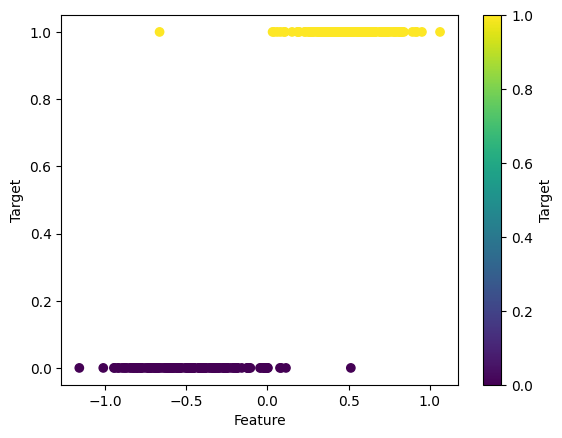

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X,y, c=y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.colorbar(label='Target')
plt.show()

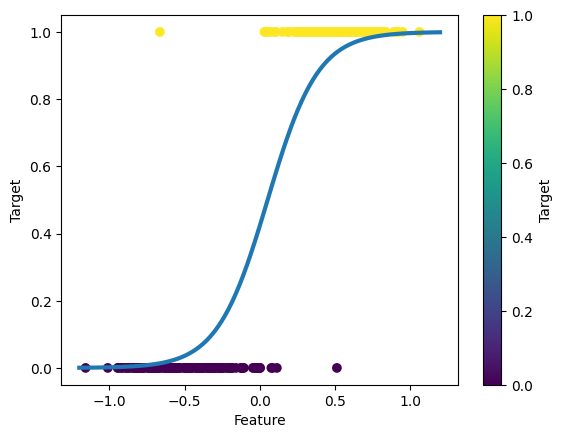

In [4]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 훈련
model.fit(X, y)

import numpy as np

x_data = np.linspace(-1.2, 1.2, 100).reshape(-1,1)
pred = model.predict_proba(x_data)[:,1]
plt.plot(x_data, pred, lw=3)

plt.scatter(X, y, c=y, )
plt.xlabel('Feature')
plt.ylabel('Target')
plt.colorbar(label='Target')
plt.show()

4. 파라미터 설명 (1)

LogisticRegression() 다양한 매개변수를 통해 모델의 동작을 세부적으로 조정할 수 있습니다. 주요 매개변수는 다음과 같습니다.

매개변수	설명
penalty	: 정규화 종류. 'l1', 'l2', 'elasticnet', 'none' 중 선택. 기본값은 'l2'.
dual	: 이중 또는 원시 방법 선택. 기본값은 False.
tol	: 최적화 중단을 위한 허용 오차. 기본값은 1e-4.
C	: 정규화 강도의 역수. 값이 작을수록 강한 정규화. 기본값은 1.0.
fit_intercept	: 모델에 절편(상수 항) 포함 여부. 기본값은 True.
intercept_scaling :	절편에 적용되는 스케일링 팩터. fit_intercept가 True일 때 사용.
class_weight :	클래스 불균형을 처리하기 위한 가중치. 기본값은 None.
random_state	: 난수 발생기 시드. 결과 재현성을 위함.
solver :	최적화 문제를 해결하기 위한 알고리즘. 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' 등 선택 가능.
max_iter :	최적화를 위한 최대 반복 횟수. 기본값은 100.
multi_class	: 다중 클래스 분류 전략. 'auto', 'ovr', 'multinomial' 중 선택.
verbose	: 로그 출력 상세도.
warm_start	: 이전 호출의 솔루션을 재사용하여 피팅을 초기화 여부. 기본값은 False.
n_jobs :	병렬 처리를 위한 CPU 코어 수. 기본값은 None (1개 코어 사용).

In [5]:
model = LogisticRegression(penalty='l2',       # L2 정규화 사용
                           C=0.5,              # 정규화 강도 (낮을수록 강한 정규화)
                           fit_intercept=True, # 절편을 포함
                           random_state=42,    # 결과 재현을 위한 난수 시드
                           solver='lbfgs',     # 최적화를 위한 알고리즘
                           max_iter=100,       # 최대 반복 횟수
                           multi_class='auto', # 다중 클래스 처리 방식
                           verbose=0,          # 로그 출력 정도 (0은 출력하지 않음)
                           n_jobs=1           # 사용할 CPU 코어 수 (1은 하나의 코어 사용)
)

5. 파이썬 예제 코드(1) - statsmodels

In [6]:
# 데이터 셋 준비
X, y = make_classification(n_features=1, n_samples=300,n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, class_sep=0.5,random_state=7)

X.shape, y.shape

((300, 1), (300,))

In [7]:
import statsmodels.api as sm

X_con = sm.add_constant(X) # 상수항 추가
sm_model = sm.Logit(y, X_con) # 모델 생성
result = sm_model.fit() # 모델 학습
print(result.summary()) # 결과 확인

Optimization terminated successfully.
         Current function value: 0.490686
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.2921
Time:                        10:11:16   Log-Likelihood:                -147.21
converged:                       True   LL-Null:                       -207.94
Covariance Type:            nonrobust   LLR p-value:                 3.005e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0837      0.146      0.574      0.566      -0.202       0.369
x1             2.1228      0.

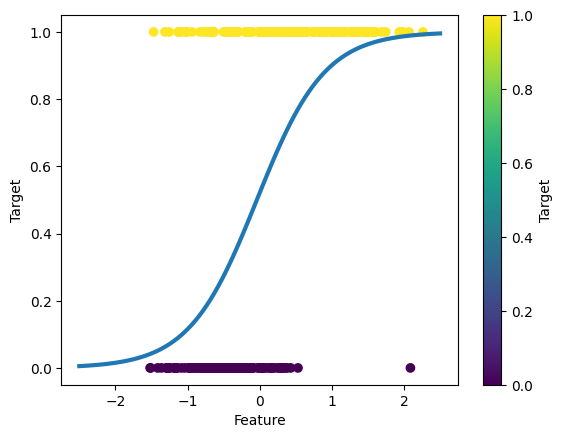

In [8]:
x_data = np.linspace(-2.5, 2.5, 100).reshape(-1, 1)
x_data_con = sm.add_constant(x_data)
pred = result.predict(x_data_con)
plt.plot(x_data, pred, lw=3)

plt.scatter(X, y, c=y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.colorbar(label='Target')
plt.show()